# Practice 1

Student 1: <font color="blue">Alejandro González Álvarez</font>

NIA 1: <font color="blue">252658</font>

Student 2: <font color="blue">Luca Franceschi</font>

NIA 2: <font color="blue">253885</font>

Student 3: <font color="blue">Júlia Othats-Dalès</font>

NIA 3: <font color="blue">254435</font>

# Ex. 1

In [108]:
'''
Steps :
  1. Load train.csv and test.csv containing a 2D dataset (features X and Y) with two different classes
  2. Visualize the dataset and normalize the dimensions of the samples to have zero mean and unit standard deviation
  3. Implement an MLP using Numpy in order to solve a classification problem trying to estimate the classes of the samples
  4. Train the MLP and visualize the decision boundary in 2D of the classification. Plot the training loss for each iteration.
  5. Use the learned MLP to estimate the classes of the data in test.csv. Compute the accuracy in training and testing dataset.
'''

'\nSteps :\n  1. Load train.csv and test.csv containing a 2D dataset (features X and Y) with two different classes\n  2. Visualize the dataset and normalize the dimensions of the samples to have zero mean and unit standard deviation\n  3. Implement an MLP using Numpy in order to solve a classification problem trying to estimate the classes of the samples\n  4. Train the MLP and visualize the decision boundary in 2D of the classification. Plot the training loss for each iteration.\n  5. Use the learned MLP to estimate the classes of the data in test.csv. Compute the accuracy in training and testing dataset.\n'

## Sol. 1

Training dataset:

   Unnamed: 0         X         Y  C
0           0 -0.263997  1.006942  0
1           1  1.678440 -0.215066  1
2           2 -1.581623 -0.003148  0
3           3 -0.863377  0.751651  0
4           4  0.998721 -0.770067  1
Testing dataset:

   Unnamed: 0         X         Y  C
0           0  1.937660  0.624911  1
1           1 -1.004030 -0.097319  0
2           2  1.542199 -0.114397  0
3           3  0.625708 -0.685214  1
4           4  0.247116 -0.348297  1
Not normalized:



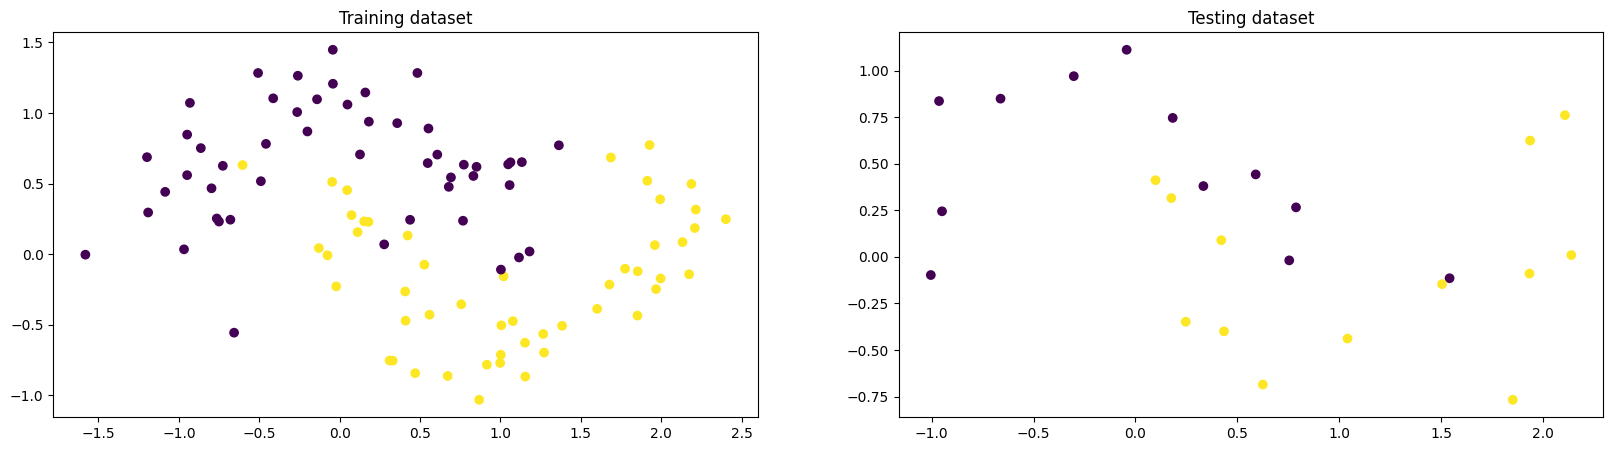


Normalized:



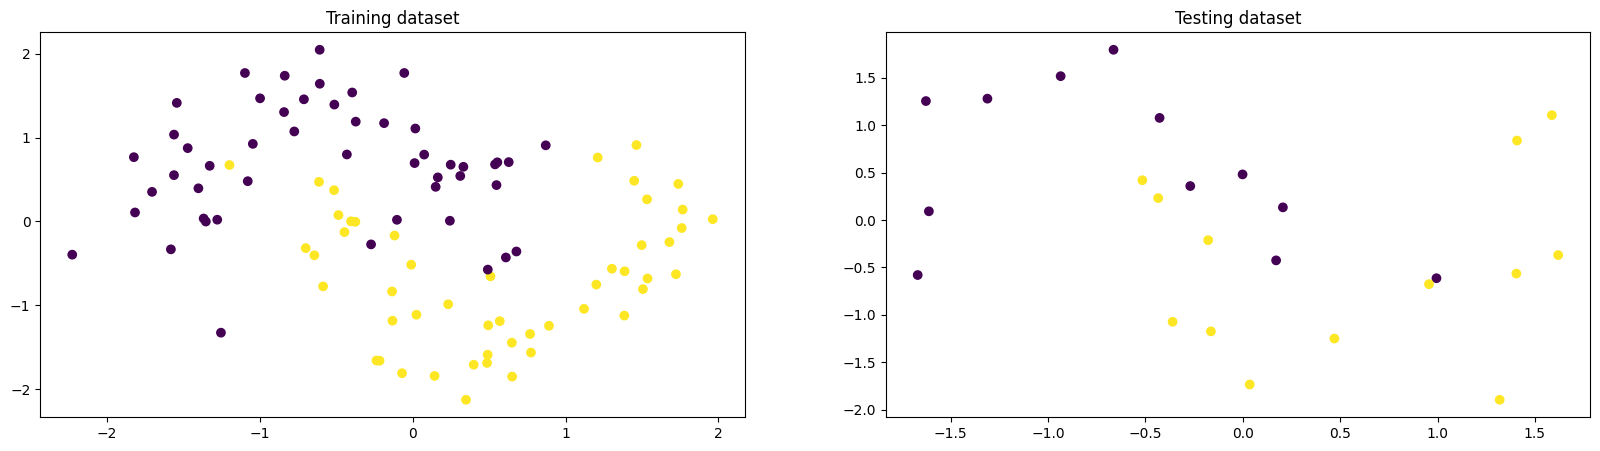

In [109]:
import pandas as pd # usage of Pandas to read and load data
import matplotlib.pyplot as plt # matplotlib for visualization
import numpy as np

#1. Load train.csv and test.csv
train_df = pd.read_csv('Data/train.csv')
test_df = pd.read_csv('Data/test.csv')

# Show 5 first elements of the datasets
print("Training dataset:\n")
print(train_df.head(5))
print("Testing dataset:\n")
print(test_df.head(5))

#2. Visualize both training and testing data
print("Not normalized:\n")
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].scatter(train_df.X, train_df.Y, c = train_df.C)
axes[0].set_title("Training dataset")
axes[1].scatter(test_df.X, test_df.Y, c = test_df.C)
axes[1].set_title("Testing dataset")
plt.show()

# Normalize data (probar np column stack)
train_df[["X", "Y"]] = (train_df[["X", "Y"]] - np.mean(train_df[["X", "Y"]], axis = 0)) / np.std(train_df[["X", "Y"]], axis = 0)
test_df[["X", "Y"]] = (test_df[["X", "Y"]] - np.mean(test_df[["X", "Y"]], axis = 0)) / np.std(test_df[["X", "Y"]], axis = 0)

print("\nNormalized:\n")
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].scatter(train_df.X, train_df.Y, c = train_df.C)
axes[0].set_title("Training dataset")
axes[1].scatter(test_df.X, test_df.Y, c = test_df.C)
axes[1].set_title("Testing dataset")
plt.show()

In [129]:
#3. Implementation of the MLP Class:
class MLP(object):
    def __init__(self,inputNode=2, hiddenNode = 3, outputNode=1):
        #Define MLP hyper-parameters
        self.inputLayerSize = inputNode # number of input dimensions (x)
        self.outputLayerSize = outputNode # number of output dimensions (y)
        self.hiddenLayerSize = hiddenNode # Dimension of intermediate layer (W_2)

        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)

    def forward(self, X):
        #Compute inputs from outputs
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat

    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

    # Derivative of sigmoid and loss with respect their inputs
    def sigmoidPrime(self, z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)

    def loss(self, yHat, y):
        #Compute loss for given X, y, use weights already stored in class.
        J = np.sum(-y * np.log(yHat) - (1-y)*np.log(1-yHat))
        return J

    # Derivative of parameters
    def backward(self, X, yHat, y):
        self.yHat = yHat
        delta3 = (-y/yHat + (1-y)/(1-yHat)) * self.sigmoidPrime(self.z3)
        dJdW2 = np.dot(self.a2.T, delta3)

        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
        return dJdW1,dJdW2
    
# Function to train a neural network (NN)
def train(NN, X, y, epoch = 10000, lr = .1):
    list_loss = []

    for i in range(epoch):
        #Compute derivative with respect to W and W2 for a given X and y:
        yHat = NN.forward(X)

        gradW1,gradW2 = NN.backward(X, yHat, y)
        #now update the weight using gradient descent
        NN.W1 -= gradW1 * lr
        NN.W2 -= gradW2 * lr

        if i%10 == 0 :
            loss = NN.loss(yHat, y)
            print('Loss {}={}'.format(i, loss))
            list_loss.append(loss)

    return list_loss

Loss 0=77.68896636181262
Loss 10=34.45194577160119
Loss 20=34.008732222589565
Loss 30=33.70205645448434
Loss 40=33.486362126806306
Loss 50=33.30995351850079
Loss 60=33.07676283641645
Loss 70=32.49811216096007
Loss 80=30.897888379026977
Loss 90=28.22662239312028
Loss 100=25.611896909174007
Loss 110=23.56829806544184
Loss 120=22.020069303071523
Loss 130=20.825135739433264
Loss 140=19.881672373832238
Loss 150=19.121878334535804
Loss 160=18.499705293002595
Loss 170=23.675498207895174
Loss 180=25.881854656224633
Loss 190=22.079512688776457
Loss 200=21.810553478974033
Loss 210=21.689109084037018
Loss 220=21.619052758198904
Loss 230=21.567375427313596
Loss 240=21.52586122397623
Loss 250=21.491339241378537
Loss 260=21.462191068354176
Loss 270=21.437377076924783
Loss 280=21.416147572986166
Loss 290=21.397927318588433
Loss 300=21.382259840526068
Loss 310=21.368774781552915
Loss 320=21.357167047521703
Loss 330=21.34718232891004
Loss 340=21.338606731370202
Loss 350=21.331258976890304
Loss 360=21.3

Text(0, 0.5, 'Loss (J) value')

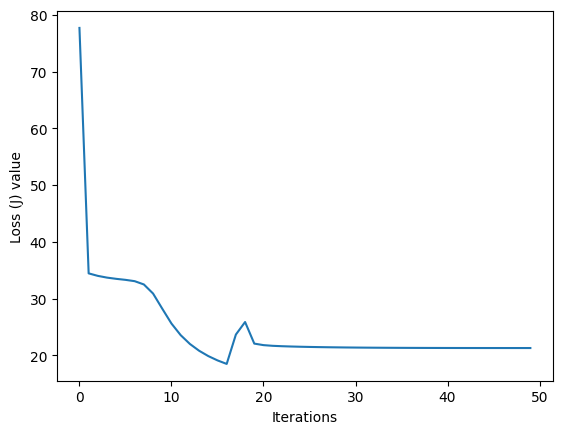

In [130]:
# Instantiate an MLP NN
mlp = MLP()

#4. Train the MLP, visualize decision boundary in 2D, and plot loss at each iteration
list_loss = train(mlp, train_df[["X", "Y"]], np.array([train_df.C]).reshape(100, 1), epoch=500, lr=0.1)

plt.plot(list_loss)
plt.xlabel('Iterations')
plt.ylabel('Loss (J) value')

# Ex. 2

In [5]:
'''
Instead of using the implemented optimizer with standard Gradient Descent, in this exercice you will use SGD with momentum.
This optimizer tipically accelerates the convergence of the optimization and, thus, it reduce the number of iterations during gradient-descent.
Steps :
  1. Try to understand how momentum is implemented reading carefully https://www.ruder.io/optimizing-gradient-descent/#momentum
  2. Modifying OptimSGD in the examples, implement SGD with momentum in a new class call OptimMom.
  3. Train the MLP implmented in numpy with this new optimizer.
  4. Use different values for the momentum paramter [0,1] and plot the evolution of the training loss during gradient-descent. Compare the results using the different values and standard gradient descent.
'''


'\nInstead of using the implemented optimizer with standard Gradient Descent, in this exercice you will use SGD with momentum.\nThis optimizer tipically accelerates the convergence of the optimization and, thus, it reduce the number of iterations during gradient-descent.\nSteps :\n  1. Try to understand how momentum is implemented reading carefully https://www.ruder.io/optimizing-gradient-descent/#momentum\n  2. Modifying OptimSGD in the examples, implement SGD with momentum in a new class call OptimMom.\n  3. Train the MLP implmented in numpy with this new optimizer.\n  4. Use different values for the momentum paramter [0,1] and plot the evolution of the training loss during gradient-descent. Compare the results using the different values and standard gradient descent.\n'

## Sol. 2

# Ex. 3

In [6]:
'''
Steps :
  1. Do the same as Ex. 1 but implementing the MLP using PyTorch.
  2. Train different vesions of the MLP by varying the number of hidden neurons and learing rates
  3. Analyse the results in each case and discuss them.

HINT: Check in https://pytorch.org/docs/stable/nn.html what loss function implemented in PyTorch you have to use in this case.
'''

'\nSteps :\n  1. Do the same as Ex. 1 but implementing the MLP using PyTorch.\n  2. Train different vesions of the MLP by varying the number of hidden neurons and learing rates\n  3. Analyse the results in each case and discuss them.\n\nHINT: Check in https://pytorch.org/docs/stable/nn.html what loss function implemented in PyTorch you have to use in this case.\n'

## Sol. 3